# Aquí utlizaré los datos para poder intentar hacer predicciones sobre futuros resutados

Para hacer las predicciones usaremos un modelo de regresión lineal, que nos proporciiona scikit-learn

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [26]:
df = pd.read_csv('docs/uefa_club_coefficients_2013_2023.csv')
df

,Team,Country,13/14,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23
0,Arsenal,Eng,18.0,20.0,15.0,19.0,21.0,26.0,10.0,23.0,0.0,17.0
1,Atlético Madrid,Esp,33.0,22.0,28.0,29.0,28.0,20.0,22.0,16.0,19.0,8.0
2,Bayern München,Ger,27.0,28.0,29.0,22.0,29.0,20.0,36.0,27.0,26.0,27.0
3,Borussia Dortmund,Ger,22.0,18.0,17.0,22.0,10.0,18.0,18.0,22.0,10.0,18.0
4,FC Barcelona,Esp,24.0,34.0,26.0,23.0,25.0,30.0,24.0,20.0,15.0,9.0
5,FC København,Den,7.0,3.0,1.0,16.0,7.0,4.0,14.0,2.5,13.0,7.0
6,FC Porto,Por,16.0,25.0,11.0,17.0,17.0,23.0,7.0,23.0,10.0,18.0
7,Internazionale,Ita,0.0,12.0,0.0,4.0,0.0,15.0,25.0,9.0,18.0,29.0
8,Lazio,Ita,10.0,0.0,14.0,0.0,17.0,6.0,4.0,17.0,9.0,6.0
9,Manchester City,Eng,19.0,15.0,26.0,18.0,22.0,25.0,25.0,35.0,27.0,33.0


Excluyendo la columna "Country" y seleccionando las temporadas como características

In [28]:

X = df.drop(columns=['Team', 'Country', '22/23'])  # Excluimos la temporada 22/23 para usarla como etiqueta
y = df['22/23']  # Usamos la temporada 22/23 como objetivo

Dividir el conjunto de datos en entrenamiento y prueba

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Construir y entrenar el modelo de árbol de regresión

In [30]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

Evaluación del modelo

In [31]:
score_train = regressor.score(X_train, y_train)
score_test = regressor.score(X_test, y_test)

score_train, score_test

(1.0, 0.031175059952038398)

Corrigiendo el conjunto de características para excluir la temporada 22/23, que es nuestro objetivo

In [32]:

X_predict_corrected = df.drop(columns=['Team', 'Country', '22/23'])

Realizar las predicciones para la temporada 23/24 nuevamente

In [33]:
df['23/24'] = regressor.predict(X_predict_corrected)
df

,Team,Country,13/14,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23,23/24
0,Arsenal,Eng,18.0,20.0,15.0,19.0,21.0,26.0,10.0,23.0,0.0,17.0,18.0
1,Atlético Madrid,Esp,33.0,22.0,28.0,29.0,28.0,20.0,22.0,16.0,19.0,8.0,19.0
2,Bayern München,Ger,27.0,28.0,29.0,22.0,29.0,20.0,36.0,27.0,26.0,27.0,27.0
3,Borussia Dortmund,Ger,22.0,18.0,17.0,22.0,10.0,18.0,18.0,22.0,10.0,18.0,18.0
4,FC Barcelona,Esp,24.0,34.0,26.0,23.0,25.0,30.0,24.0,20.0,15.0,9.0,9.0
5,FC København,Den,7.0,3.0,1.0,16.0,7.0,4.0,14.0,2.5,13.0,7.0,16.0
6,FC Porto,Por,16.0,25.0,11.0,17.0,17.0,23.0,7.0,23.0,10.0,18.0,18.0
7,Internazionale,Ita,0.0,12.0,0.0,4.0,0.0,15.0,25.0,9.0,18.0,29.0,29.0
8,Lazio,Ita,10.0,0.0,14.0,0.0,17.0,6.0,4.0,17.0,9.0,6.0,6.0
9,Manchester City,Eng,19.0,15.0,26.0,18.0,22.0,25.0,25.0,35.0,27.0,33.0,33.0


In [34]:
df = df.sort_values(by='23/24', ascending=False)

In [35]:
df

,Team,Country,13/14,14/15,15/16,16/17,17/18,18/19,19/20,20/21,21/22,22/23,23/24
9,Manchester City,Eng,19.0,15.0,26.0,18.0,22.0,25.0,25.0,35.0,27.0,33.0,33.0
7,Internazionale,Ita,0.0,12.0,0.0,4.0,0.0,15.0,25.0,9.0,18.0,29.0,29.0
2,Bayern München,Ger,27.0,28.0,29.0,22.0,29.0,20.0,36.0,27.0,26.0,27.0,27.0
10,Napoli,Ita,16.0,22.0,13.0,17.0,10.0,18.0,19.0,10.0,9.0,25.0,25.0
1,Atlético Madrid,Esp,33.0,22.0,28.0,29.0,28.0,20.0,22.0,16.0,19.0,8.0,19.0
12,Paris Saint-Germain,Fra,25.0,21.0,24.0,20.0,19.0,19.0,31.0,24.0,19.0,19.0,19.0
14,Real Madrid,Esp,35.0,29.0,33.0,33.0,32.0,19.0,17.0,26.0,30.0,29.0,19.0
0,Arsenal,Eng,18.0,20.0,15.0,19.0,21.0,26.0,10.0,23.0,0.0,17.0,18.0
3,Borussia Dortmund,Ger,22.0,18.0,17.0,22.0,10.0,18.0,18.0,22.0,10.0,18.0,18.0
6,FC Porto,Por,16.0,25.0,11.0,17.0,17.0,23.0,7.0,23.0,10.0,18.0,18.0


In [36]:
df.to_csv('docs/predicciones_temporada_23_24.csv', index=False)

Graficamos el movimiento de estos equipos año por año

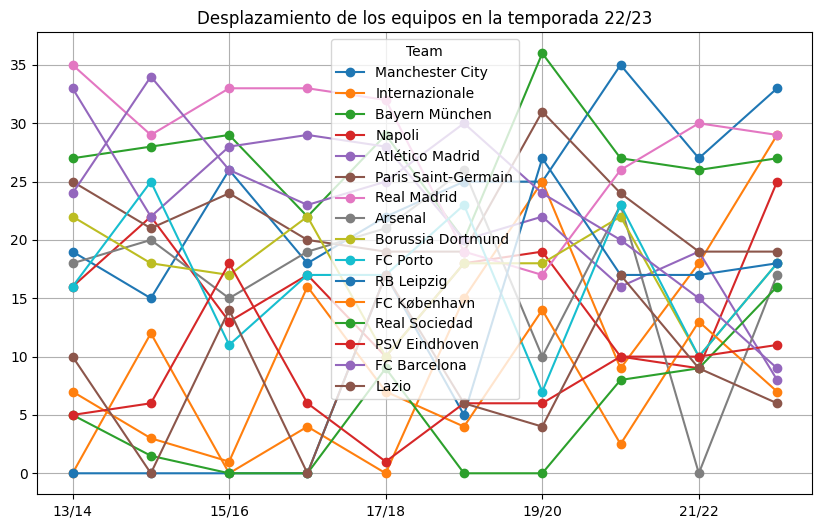

In [37]:
df = pd.read_csv('docs/predicciones_temporada_23_24.csv')

df = df.drop(columns=['Country', '23/24'])

df = df.set_index('Team')

df = df.T

df.plot(figsize=(10, 6), marker='o', title='Desplazamiento de los equipos en la temporada 22/23', grid=True)
plt.show()

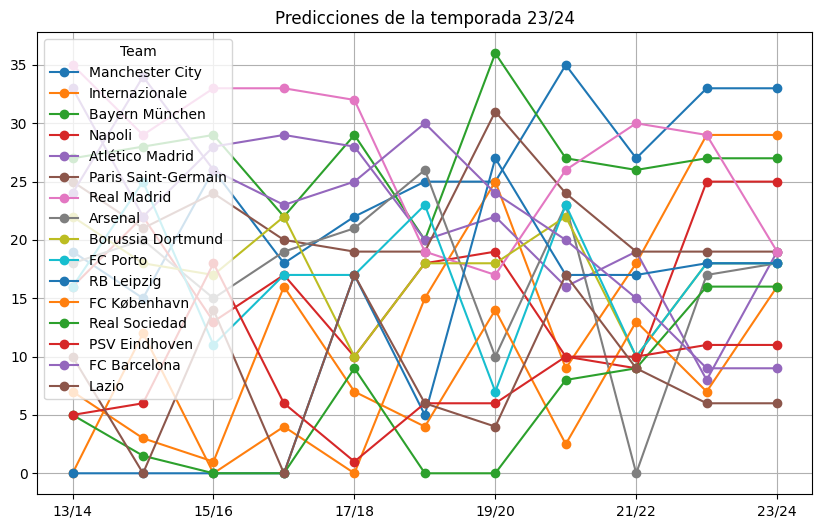

In [39]:
df = pd.read_csv('docs/predicciones_temporada_23_24.csv')

df = df.drop(columns=['Country'])

df = df.set_index('Team')

df = df.T

df.plot(figsize=(10, 6), marker='o', title='Predicciones de la temporada 23/24', grid=True)
plt.show()